In [110]:
#IMPORTING LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [111]:
train = pd.read_excel("Salary.xlsx")

In [112]:
train.head()

,Age,Education,Education Yrs,Marital Status,Employer,Occupation,Relationship Status,Sex,Capital Gain,Capital Loss,Hours per Week,Native Country,Salary
0,39,Bachelors,13,Never-married,State-gov,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,77516
1,50,Bachelors,13,Married-civ-spouse,Self-emp-not-inc,Exec-managerial,Husband,Male,0,0,13,United-States,83311
2,38,HS-grad,9,Divorced,Private,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,215646
3,53,11th,7,Married-civ-spouse,Private,Handlers-cleaners,Husband,Male,0,0,40,United-States,234721
4,28,Bachelors,13,Married-civ-spouse,Private,Prof-specialty,Wife,Female,0,0,40,Cuba,338409


In [113]:
test = pd.read_excel("Hold_out.xlsx")

In [114]:
test.head()

,Age,Education,Education Yrs,Marital Status,Employer,Occupation,Relationship Status,Sex,Capital Gain,Capital Loss,Hours per Week,Native Country
0,37,HS-grad,9,Divorced,Private,Craft-repair,Not-in-family,Male,0,0,49,United-States
1,19,HS-grad,9,Never-married,Private,Adm-clerical,Own-child,Female,0,0,16,United-States
2,59,HS-grad,9,Married-civ-spouse,Self-emp-not-inc,Exec-managerial,Husband,Male,0,0,40,United-States
3,50,Some-college,10,Married-civ-spouse,Federal-gov,Adm-clerical,Husband,Male,0,0,40,United-States
4,33,Bachelors,13,Married-civ-spouse,Private,Exec-managerial,Husband,Male,0,0,50,United-States


In [115]:
train_len = len(train)
test_len = len(test)

In [116]:
data = pd.concat([train,test],axis = 0)
data.reset_index(drop=True,inplace=True)
data.head()

,Age,Education,Education Yrs,Marital Status,Employer,Occupation,Relationship Status,Sex,Capital Gain,Capital Loss,Hours per Week,Native Country,Salary
0,39,Bachelors,13,Never-married,State-gov,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,77516.0
1,50,Bachelors,13,Married-civ-spouse,Self-emp-not-inc,Exec-managerial,Husband,Male,0,0,13,United-States,83311.0
2,38,HS-grad,9,Divorced,Private,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,215646.0
3,53,11th,7,Married-civ-spouse,Private,Handlers-cleaners,Husband,Male,0,0,40,United-States,234721.0
4,28,Bachelors,13,Married-civ-spouse,Private,Prof-specialty,Wife,Female,0,0,40,Cuba,338409.0


In [117]:
print(len(train),len(test),len(data))

25999 6562 32561


In [118]:
data = data.rename({"Native Country": "Country"}, axis=1)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hours per Week'>

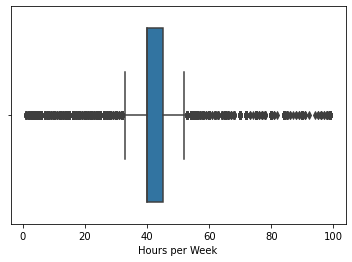

In [119]:
sns.boxplot(data['Hours per Week'])

In [120]:
def remove_outlier_hours_per_week(data):
    IQR = data['Hours per Week'].quantile(0.75) - data['Hours per Week'].quantile(0.25)
    lower_range = data['Hours per Week'].quantile(0.25) - (1.5 * IQR)
    upper_range = data['Hours per Week'].quantile(0.75) + (1.5 * IQR)                                                  
    data.loc[data['Hours per Week'] <= lower_range, 'Hours per Week'] = lower_range
    data.loc[data['Hours per Week'] >= upper_range, 'Hours per Week'] = upper_range

In [121]:
remove_outlier_hours_per_week(data)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hours per Week'>

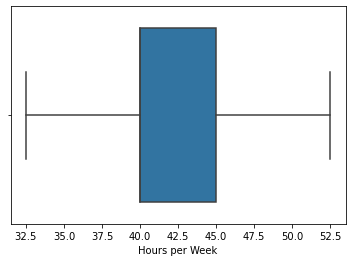

In [122]:
sns.boxplot(data['Hours per Week'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education Yrs'>

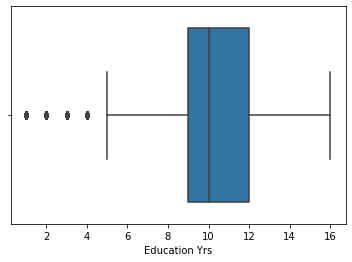

In [123]:
sns.boxplot(data['Education Yrs'])

In [124]:
def remove_outlier_education_yrs(data):
    IQR = data['Education Yrs'].quantile(0.75) - data['Education Yrs'].quantile(0.25)
    lower_range = data['Education Yrs'].quantile(0.25) - (1.5 * IQR)
    upper_range = data['Education Yrs'].quantile(0.75) + (1.5 * IQR)                                                  
    data.loc[data['Education Yrs'] <= lower_range, 'Education Yrs'] = lower_range
    data.loc[data['Education Yrs'] >= upper_range, 'Education Yrs'] = upper_range

In [125]:
remove_outlier_education_yrs(data)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education Yrs'>

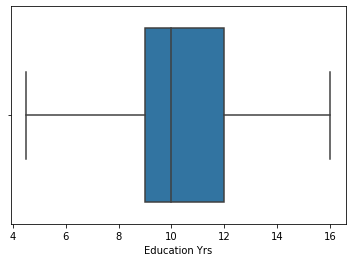

In [126]:
sns.boxplot(data['Education Yrs'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

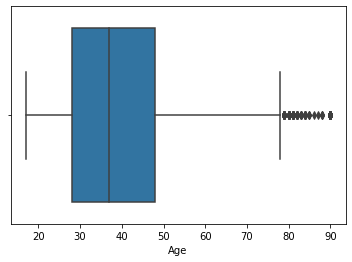

In [127]:
sns.boxplot(data['Age'])

In [128]:
def remove_outlier_age(data):
    IQR = data['Age'].quantile(0.75) - data['Age'].quantile(0.25)
    lower_range = data['Age'].quantile(0.25) - (1.5 * IQR)
    upper_range = data['Age'].quantile(0.75) + (1.5 * IQR)                                                  
    data.loc[data['Age'] <= lower_range, 'Age'] = lower_range
    data.loc[data['Age'] >= upper_range, 'Age'] = upper_range

In [129]:
remove_outlier_age(data)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

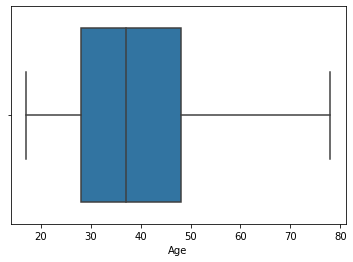

In [130]:
sns.boxplot(data['Age'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Capital Gain'>

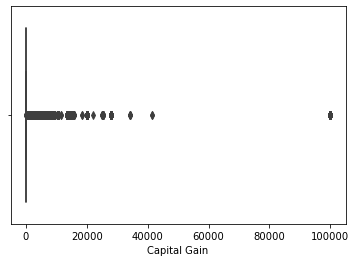

In [131]:
sns.boxplot(data['Capital Gain'])

In [132]:
def remove_outlier_Capital_Gain(data):
    IQR = data['Capital Gain'].quantile(0.75) - data['Capital Gain'].quantile(0.25)
    lower_range = data['Capital Gain'].quantile(0.25) - (1.5 * IQR)
    upper_range = data['Capital Gain'].quantile(0.75) + (1.5 * IQR)                                                  
    data.loc[data['Capital Gain'] <= lower_range, 'Capital Gain'] = lower_range
    data.loc[data['Capital Gain'] >= upper_range, 'Capital Gain'] = upper_range

In [133]:
remove_outlier_Capital_Gain(data)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Capital Gain'>

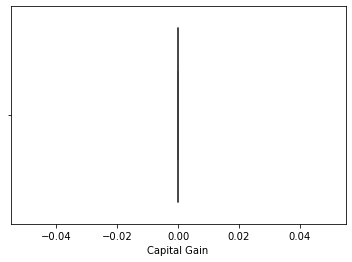

In [134]:
sns.boxplot(data['Capital Gain'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Capital Loss'>

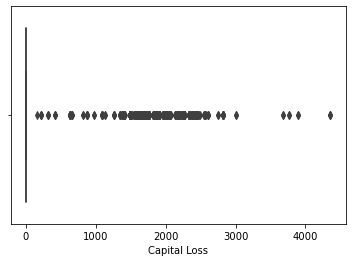

In [135]:
sns.boxplot(data['Capital Loss'])

In [136]:
def remove_outlier_Capital_Loss(data):
    IQR = data['Capital Loss'].quantile(0.75) - data['Capital Loss'].quantile(0.25)
    lower_range = data['Capital Loss'].quantile(0.25) - (1.5 * IQR)
    upper_range = data['Capital Loss'].quantile(0.75) + (1.5 * IQR)                                                  
    data.loc[data['Capital Loss'] <= lower_range, 'Capital Loss'] = lower_range
    data.loc[data['Capital Loss'] >= upper_range, 'Capital Loss'] = upper_range

In [137]:
remove_outlier_Capital_Loss(data)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Capital Loss'>

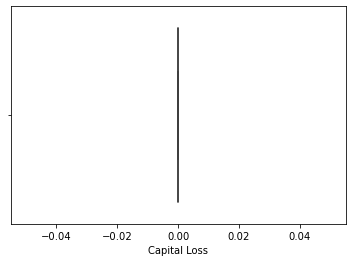

In [138]:
sns.boxplot(data['Capital Loss'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

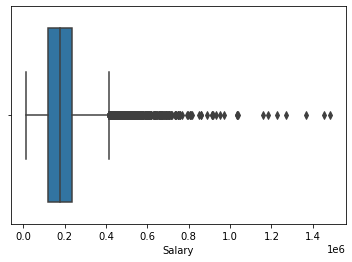

In [139]:
sns.boxplot(data['Salary'])

In [140]:
def remove_outlier_Salary(data):
    IQR = data['Salary'].quantile(0.75) - data['Salary'].quantile(0.25)
    lower_range = data['Salary'].quantile(0.25) - (1.5 * IQR)
    upper_range = data['Salary'].quantile(0.75) + (1.5 * IQR)                                                  
    data.loc[data['Salary'] <= lower_range, 'Salary'] = lower_range
    data.loc[data['Salary'] >= upper_range, 'Salary'] = upper_range

In [141]:
remove_outlier_Salary(data)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

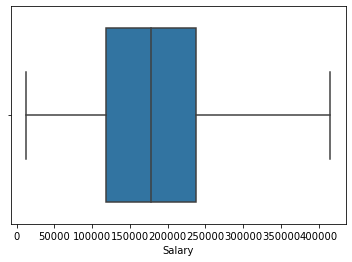

In [142]:
sns.boxplot(data['Salary'])

In [143]:
data = data[[ 'Education','Education Yrs', 'Marital Status', 'Employer',
       'Occupation', 'Hours per Week', 'Country','Capital Gain','Capital Loss','Salary']]
data.head()

,Education,Education Yrs,Marital Status,Employer,Occupation,Hours per Week,Country,Capital Gain,Capital Loss,Salary
0,Bachelors,13.0,Never-married,State-gov,Adm-clerical,40.0,United-States,0,0,77516.0
1,Bachelors,13.0,Married-civ-spouse,Self-emp-not-inc,Exec-managerial,32.5,United-States,0,0,83311.0
2,HS-grad,9.0,Divorced,Private,Handlers-cleaners,40.0,United-States,0,0,215646.0
3,11th,7.0,Married-civ-spouse,Private,Handlers-cleaners,40.0,United-States,0,0,234721.0
4,Bachelors,13.0,Married-civ-spouse,Private,Prof-specialty,40.0,Cuba,0,0,338409.0


In [144]:
data = data[data["Salary"].notnull()]
data.head()

,Education,Education Yrs,Marital Status,Employer,Occupation,Hours per Week,Country,Capital Gain,Capital Loss,Salary
0,Bachelors,13.0,Never-married,State-gov,Adm-clerical,40.0,United-States,0,0,77516.0
1,Bachelors,13.0,Married-civ-spouse,Self-emp-not-inc,Exec-managerial,32.5,United-States,0,0,83311.0
2,HS-grad,9.0,Divorced,Private,Handlers-cleaners,40.0,United-States,0,0,215646.0
3,11th,7.0,Married-civ-spouse,Private,Handlers-cleaners,40.0,United-States,0,0,234721.0
4,Bachelors,13.0,Married-civ-spouse,Private,Prof-specialty,40.0,Cuba,0,0,338409.0


In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25999 entries, 0 to 25998
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Education       25999 non-null  object 
 1   Education Yrs   25999 non-null  float64
 2   Marital Status  25999 non-null  object 
 3   Employer        25999 non-null  object 
 4   Occupation      25999 non-null  object 
 5   Hours per Week  25999 non-null  float64
 6   Country         25999 non-null  object 
 7   Capital Gain    25999 non-null  int64  
 8   Capital Loss    25999 non-null  int64  
 9   Salary          25999 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 2.2+ MB


In [146]:
data = data.dropna()
data.isnull().sum()

Education         0
Education Yrs     0
Marital Status    0
Employer          0
Occupation        0
Hours per Week    0
Country           0
Capital Gain      0
Capital Loss      0
Salary            0
dtype: int64

In [147]:
data['Country'].value_counts()

 United-States                 23306
 Mexico                          509
 ?                               465
 Philippines                     159
 Germany                         106
 Canada                          103
 Puerto-Rico                     100
 England                          78
 El-Salvador                      76
 Cuba                             74
 India                            71
 South                            67
 China                            63
 Jamaica                          61
 Italy                            55
 Dominican-Republic               55
 Poland                           53
 Guatemala                        53
 Vietnam                          52
 Japan                            50
 Columbia                         46
 Taiwan                           44
 Haiti                            38
 Iran                             38
 Portugal                         28
 Nicaragua                        27
 Greece                           23
 

In [148]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map


In [149]:
country_map = shorten_categories(data.Country.value_counts(), 100)
data['Country'] = data['Country'].map(country_map)
data.Country.value_counts()

 United-States    23306
Other              1251
 Mexico             509
 ?                  465
 Philippines        159
 Germany            106
 Canada             103
 Puerto-Rico        100
Name: Country, dtype: int64

In [150]:
data['Country'] = np.where(data['Country'] == ' ?','Missing',data['Country'])

In [151]:
indexCountry= data[data['Country'] == 'Missing' ].index
data.drop(indexCountry , inplace=True)

In [152]:
data.Country.value_counts()

 United-States    23306
Other              1251
 Mexico             509
 Philippines        159
 Germany            106
 Canada             103
 Puerto-Rico        100
Name: Country, dtype: int64

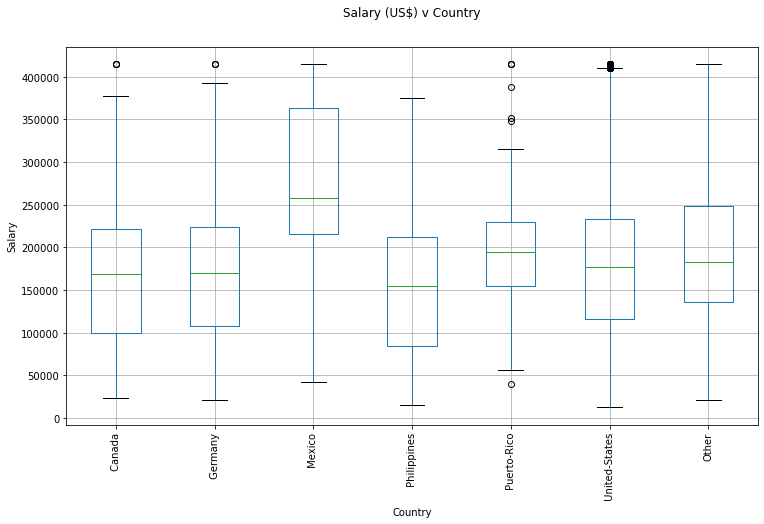

In [153]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
data.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [154]:
data['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [155]:
def clean_education(x):
    if ' Bachelors' in x:
        return 'Bachelor’s degree'
    if ' Assoc-voc' in x or ' Assoc-acdm' in x:
        return 'Associates'
    if ' HS-grad' in x:
        return 'HS-Graduate'
    if ' Some-college' in x:
        return 'Colleges'
    if ' Masters'  in x:
        return 'Master’s'
    if ' Prof-school' in x:
        return 'Post grad'
    if ' Doctorate' in x:
        return 'Doctorate'
    return 'Dropout'

data['Education'] = data['Education'].apply(clean_education)

In [156]:
data['Education'].unique()

array(['Bachelor’s degree', 'HS-Graduate', 'Dropout', 'Master’s',
       'Colleges', 'Associates', 'Doctorate', 'Post grad'], dtype=object)

In [157]:
data['Marital Status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [158]:
def clean_marital(x):
    if ' Married-civ-spouse' in x or ' Married-AF-spouse' in x :
        return 'Married'
    if ' Married-spouse-absent' in x or ' Separated' in x or ' Divorced' in x:
        return 'Not-married'
    if ' Widowed' in x:
        return ' Widowed'
    if ' Never-married' in x:
        return ' Never-married'

data['Marital Status'] = data['Marital Status'].apply(clean_marital)

In [159]:
data['Marital Status'].unique()

array([' Never-married', 'Married', 'Not-married', ' Widowed'],
      dtype=object)

In [160]:
data['Occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [161]:
indexCountry= data[data['Occupation'] == ' ?' ].index
data.drop(indexCountry , inplace=True)

In [162]:
data['Occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [163]:
def clean_Occupation(x):
    if ' Adm-clerical' in x:
        return 'Admin'
    if ' Armed-Forces' in x:
        return 'Military'
    if ' Craft-repair' in x or ' Farming-fishing' in x or ' Handlers-cleaners' in x or ' Machine-op-inspct' in x or  ' Transport-moving' in x:
        return 'Blue-Collar'
    if ' Exec-managerial' in x:
        return 'White-Collar'
    if ' Other-service'  in x or ' Priv-house-serv'  in x:
        return 'Service'
    if ' Prof-specialty' in x:
        return 'Professional'
    if ' Protective-serv' in x or ' Tech-support' in x:
        return 'Other-Occupations'
    if ' Sales' in x:
        return 'Sales'

data['Occupation'] = data['Occupation'].apply(clean_Occupation)

In [164]:
data['Occupation'].unique()

array(['Admin', 'White-Collar', 'Blue-Collar', 'Professional', 'Service',
       'Sales', 'Other-Occupations', 'Military'], dtype=object)

In [165]:
data['Employer'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [166]:
data['Employer'].value_counts()

 Private             17752
 Self-emp-not-inc     2013
 Local-gov            1680
 State-gov            1018
 Self-emp-inc          863
 Federal-gov           756
 Without-pay            10
Name: Employer, dtype: int64

In [167]:
def clean_Employer(x):
    if ' Without-pay' in x:
        return ' Without-pay'
    if ' Self-emp-not-inc' in x or ' Self-emp-inc' in x:
        return 'Self-employed'
    if ' Local-gov' in x or ' State-gov' in x:
        return 'Other-gov'
    if ' Private' in x:
        return 'Private'
    if ' Federal-gov'  in x:
        return 'Federal-gov'

data['Employer'] = data['Employer'].apply(clean_Employer)

In [168]:
data['Employer'].unique()

array(['Other-gov', 'Self-employed', 'Private', 'Federal-gov',
       ' Without-pay'], dtype=object)

In [169]:
data['Hours per Week'].unique()

array([40. , 32.5, 45. , 50. , 52.5, 35. , 52. , 44. , 43. , 38. , 48. ,
       41. , 36. , 46. , 42. , 34. , 33. , 47. , 37. , 39. , 49. , 51. ])

In [170]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
data['Education'] = le_education.fit_transform(data['Education'])

le_country = LabelEncoder()
data['Country'] = le_country.fit_transform(data['Country'])

le_marital = LabelEncoder()
data['Marital Status'] = le_marital.fit_transform(data['Marital Status'])

le_employer = LabelEncoder()
data['Employer'] = le_employer.fit_transform(data['Employer'])

le_occupation = LabelEncoder()
data['Occupation'] = le_occupation.fit_transform(data['Occupation'])

In [171]:
data.columns

Index(['Education', 'Education Yrs', 'Marital Status', 'Employer',
       'Occupation', 'Hours per Week', 'Country', 'Capital Gain',
       'Capital Loss', 'Salary'],
      dtype='object')

In [172]:
data.head(15)

,Education,Education Yrs,Marital Status,Employer,Occupation,Hours per Week,Country,Capital Gain,Capital Loss,Salary
0,1,13.0,0,2,0,40.0,5,0,0,77516.0
1,1,13.0,2,4,7,32.5,5,0,0,83311.0
2,5,9.0,3,3,1,40.0,5,0,0,215646.0
3,4,7.0,2,3,1,40.0,5,0,0,234721.0
4,1,13.0,2,3,4,40.0,6,0,0,338409.0
5,6,14.0,2,3,7,40.0,5,0,0,284582.0
6,4,5.0,3,3,6,32.5,6,0,0,160187.0
7,5,9.0,2,4,7,45.0,5,0,0,209642.0
8,6,14.0,0,3,4,50.0,5,0,0,45781.0
9,1,13.0,2,3,7,40.0,5,0,0,159449.0


In [173]:
train = data.iloc[:train_len - test_len  ,:]
test = data.iloc[train_len - test_len  :,:]

In [174]:
train.head()

,Education,Education Yrs,Marital Status,Employer,Occupation,Hours per Week,Country,Capital Gain,Capital Loss,Salary
0,1,13.0,0,2,0,40.0,5,0,0,77516.0
1,1,13.0,2,4,7,32.5,5,0,0,83311.0
2,5,9.0,3,3,1,40.0,5,0,0,215646.0
3,4,7.0,2,3,1,40.0,5,0,0,234721.0
4,1,13.0,2,3,4,40.0,6,0,0,338409.0


In [175]:
train.tail()

,Education,Education Yrs,Marital Status,Employer,Occupation,Hours per Week,Country,Capital Gain,Capital Loss,Salary
20975,2,10.0,2,2,3,32.5,5,0,0,99823.0
20976,1,13.0,0,3,3,50.0,5,0,0,37379.0
20977,5,9.0,0,3,1,40.0,5,0,0,148645.0
20978,6,14.0,0,3,4,52.5,5,0,0,180477.0
20979,2,10.0,0,3,3,40.0,5,0,0,123147.0


In [176]:
test = test.drop("Salary", axis=1)
test.tail()

,Education,Education Yrs,Marital Status,Employer,Occupation,Hours per Week,Country,Capital Gain,Capital Loss
25994,2,10.0,2,3,1,40.0,6,0,0
25995,1,13.0,2,4,4,45.0,5,0,0
25996,5,9.0,2,3,1,40.0,5,0,0
25997,5,9.0,2,3,0,36.0,5,0,0
25998,2,10.0,3,2,1,40.0,5,0,0


In [177]:
test.head()

,Education,Education Yrs,Marital Status,Employer,Occupation,Hours per Week,Country,Capital Gain,Capital Loss
20980,1,13.0,2,3,7,45.0,5,0,0
20981,0,11.0,3,2,4,40.0,5,0,0
20982,0,12.0,3,2,6,32.5,5,0,0
20983,5,9.0,2,3,1,40.0,5,0,0
20984,1,13.0,2,3,7,40.0,5,0,0


In [178]:
X = train.drop(["Salary",'Capital Gain','Capital Loss'], axis=1)
y = train["Salary"]


In [179]:
type(X)

pandas.core.frame.DataFrame

In [180]:
X.values

array([[ 1. , 13. ,  0. , ...,  0. , 40. ,  5. ],
       [ 1. , 13. ,  2. , ...,  7. , 32.5,  5. ],
       [ 5. ,  9. ,  3. , ...,  1. , 40. ,  5. ],
       ...,
       [ 5. ,  9. ,  0. , ...,  1. , 40. ,  5. ],
       [ 6. , 14. ,  0. , ...,  4. , 52.5,  5. ],
       [ 2. , 10. ,  0. , ...,  3. , 40. ,  5. ]])

In [181]:
X.shape

(19437, 7)

In [182]:
y.shape

(19437,)

In [183]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# from sklearn.preprocessing import MinMaxScaler
# norm = MinMaxScaler()
# X = norm.fit_transform(X)

In [184]:
from sklearn.model_selection import train_test_split

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state=42)

In [186]:
print("Train data shape : {}".format(X_train.shape))
print("Test data shape : {}".format(X_test.shape))

Train data shape : (15549, 7)
Test data shape : (3888, 7)


In [187]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X,y)

LinearRegression()

In [188]:
y_pred = linear_reg.predict(X_test)

In [189]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import numpy as np
error = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [190]:
r2

0.005621313744900269

In [191]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0,max_depth = 3)
dec_tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [192]:
y_pred = dec_tree_reg.predict(X_test)

In [193]:
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("${:,.02f}".format(error))
r2 = r2_score(y_test, y_pred)

$95,198.42


In [194]:
r2

0.019326177711269876

In [195]:
# A=regressor.predict(X_test)
# print(A)


In [196]:
# r2 = r2_score(y_test,A)
# r2

In [197]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(objective="RMSE")

In [198]:
# model.fit(X_train, y_train)

In [199]:
# y_pred = model.predict(X_test)

In [200]:
# r2 = r2_score(y_test,y_pred)
# r2

In [201]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=50)
random_forest_reg.fit(X, y)

RandomForestRegressor(random_state=50)

In [202]:
y_pred = random_forest_reg.predict(X_test)

In [203]:
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("${:,.02f}".format(error))
r2 = r2_score(y_test, y_pred)

$85,497.54


In [204]:
r2

0.20900752682424273

In [205]:
#  X

In [206]:
# X = np.array([['Master’s', 9,'Married','Private','Service',30.0,' United-States']])
# X

In [207]:
# X[:, 0] = le_education.transform(X[:,0])
# # X[:, 1] = le_educationyears.transform(X[:,1])
# X[:, 2] = le_marital.transform(X[:,2])
# X[:, 3] = le_employer.transform(X[:,3])
# X[:, 4] = le_occupation.transform(X[:,4])
# # X[:, 5] = le_hpr.transform(X[:,5])
# X[:, 6] = le_country.transform(X[:,6])
# X = X.astype(float)
# X

In [208]:
# y_pred = random_forest_reg.predict(X)
# y_pred

In [209]:
# import pickle

In [210]:
# data = {"model": random_forest_reg, "le_education": le_education, "le_marital": le_marital, "le_employer": le_employer,"le_occupation": le_occupation, "le_country": le_country}
# with open('saved_steps.pkl', 'wb') as file:
#     pickle.dump(data, file)

In [211]:
# with open('saved_steps.pkl', 'rb') as file:
#     data = pickle.load(file)

# regressor_loaded = data["model"]
# le_education = data["le_education"]
# le_marital = data["le_marital"]
# le_employer = data["le_employer"]
# le_occupation = data["le_occupation"]
# le_country = data["le_country"]

In [212]:
# y_pred = random_forest_reg.predict(X)
# y_pred

In [213]:
x_test =test.drop(columns=['Capital Gain','Capital Loss'])
x_test.head()

,Education,Education Yrs,Marital Status,Employer,Occupation,Hours per Week,Country
20980,1,13.0,2,3,7,45.0,5
20981,0,11.0,3,2,4,40.0,5
20982,0,12.0,3,2,6,32.5,5
20983,5,9.0,2,3,1,40.0,5
20984,1,13.0,2,3,7,40.0,5


In [214]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(X, y)

RandomForestRegressor()

In [215]:
pred = random_forest_reg.predict(x_test)
pred

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([121948.025     , 128463.1025    , 128463.1025    , ...,
       165389.8277979 , 221086.56303804, 165389.8277979 ])

In [216]:
submission =  pd.DataFrame()
submission['Education'] = test['Education']
submission['Education Yrs'] = test['Education Yrs']
submission['Marital Status'] = test['Marital Status']
submission['Employer'] = test['Employer']
submission['Occupation'] = test['Occupation']
submission['Hours per Week'] = test['Hours per Week']
submission['Country'] = test['Country']


submission['Salary'] = pred
submission.head()

,Education,Education Yrs,Marital Status,Employer,Occupation,Hours per Week,Country,Salary
20980,1,13.0,2,3,7,45.0,5,121948.025000
20981,0,11.0,3,2,4,40.0,5,128463.102500
20982,0,12.0,3,2,6,32.5,5,128463.102500
20983,5,9.0,2,3,1,40.0,5,165389.827798
20984,1,13.0,2,3,7,40.0,5,121948.025000


In [218]:
submission.to_csv('Hold_out_result.csv',index=False)